In [1]:
import numpy as np
import keras
import sklearn

from keras.models import Sequential
from keras.layers import Dense, Dropout

import tensorflow.random as tf_r
np.random.seed(12345)
tf_r.set_seed(12345)

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

First 10 datas:
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


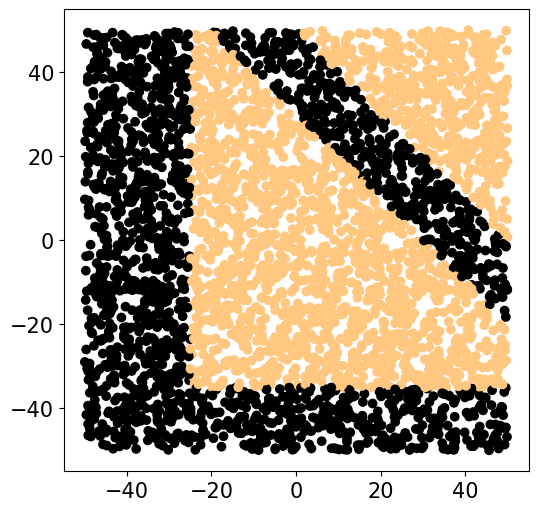

In [2]:
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)
L = len(x[0])

print("First 10 datas:")
for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y);

In [3]:
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]

# We normalize the data (probably it's bettere to use mean and std than a fixed value)
x_train = x_train / 50
x_valid = x_valid / 50

print("Train:", len(x_train), "\t Validation:", len(x_valid))


Train: 3200 	 Validation: 800


In [4]:
# Here we define our model

def compile_model(optimizer, dropout_rate, output_dim=2):
    print("opt", optimizer, "rate", dropout_rate, "out_dim", output_dim)
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_dim, activation='sigmoid'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model

# print(model.summary())


In [9]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# call Keras scikit wrapper
batch_size = 50
n_epochs = 100
model_gridsearch = KerasClassifier(build_fn=compile_model,
                                   epochs=n_epochs,
                                   batch_size=batch_size,
                                   verbose=2)

# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['Adam', "Adamax"]
dropout_rates = [0, 0.01, 0.1]
param_grid = {"optimizer": optimizer, "dropout_rate": dropout_rates}

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)

y_train_cat = keras.utils.to_categorical(y_train, 2)
grid_result = grid.fit(x_train, y_train_cat)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\Emanuele\AppData\Local\Temp\ipykernel_9504\217399376.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=compile_model,


opt Adam rate 0 out_dim 2
Epoch 1/100
64/64 - 1s - loss: 0.6574 - accuracy: 0.7059 - 956ms/epoch - 15ms/step
Epoch 2/100
64/64 - 0s - loss: 0.5503 - accuracy: 0.7534 - 97ms/epoch - 2ms/step
Epoch 3/100
64/64 - 0s - loss: 0.4683 - accuracy: 0.8009 - 100ms/epoch - 2ms/step
Epoch 4/100
64/64 - 0s - loss: 0.4324 - accuracy: 0.8197 - 114ms/epoch - 2ms/step
Epoch 5/100
64/64 - 0s - loss: 0.4098 - accuracy: 0.8297 - 130ms/epoch - 2ms/step
Epoch 6/100
64/64 - 0s - loss: 0.3941 - accuracy: 0.8413 - 144ms/epoch - 2ms/step
Epoch 7/100
64/64 - 0s - loss: 0.3795 - accuracy: 0.8478 - 132ms/epoch - 2ms/step
Epoch 8/100
64/64 - 0s - loss: 0.3714 - accuracy: 0.8516 - 124ms/epoch - 2ms/step
Epoch 9/100
64/64 - 0s - loss: 0.3600 - accuracy: 0.8575 - 103ms/epoch - 2ms/step
Epoch 10/100
64/64 - 0s - loss: 0.3517 - accuracy: 0.8575 - 108ms/epoch - 2ms/step
Epoch 11/100
64/64 - 0s - loss: 0.3448 - accuracy: 0.8612 - 106ms/epoch - 2ms/step
Epoch 12/100
64/64 - 0s - loss: 0.3393 - accuracy: 0.8634 - 107ms/epoc

In [7]:

best_parameters = {"optimizer": "Adam", "dropout_rate": 0}

# See how to performances changes when N is reduced
total_data_ratios = np.array([0.9, 0.75, 0.5, 0.3])
total_data_N = np.round(len(x) * total_data_ratios).astype(int)

# something is wrong with this code, because the loss it's always zero, and the accuracy is the same (and < 0.5)
for N in total_data_N:
    x_cut, y_cut = x[0:N], y[0:N]
    N_train = int(perc_train * N)
    x_train, y_train = x_cut[0:N_train], y_cut[0:N_train]
    x_valid, y_valid = x_cut[N_train:], y_cut[N_train:]
    model = compile_model(**best_parameters, output_dim=1)
    fit = model.fit(x_train, y_train, epochs=50, batch_size=50, validation_data=(x_valid, y_valid), verbose=1)
    print(fit.history)
    print("N:", N, "validation accuracy:", fit.history['val_accuracy'])

    # print(fit)
    break


opt Adam rate 0 out_dim 1
Epoch 1/50
58/58 [==============================] - 2s 8ms/step - loss: 0.0000e+00 - accuracy: 0.4944 - val_loss: 0.0000e+00 - val_accuracy: 0.4861
Epoch 2/50
58/58 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.4847 - val_loss: 0.0000e+00 - val_accuracy: 0.4861
Epoch 3/50
58/58 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.4847 - val_loss: 0.0000e+00 - val_accuracy: 0.4861
Epoch 4/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.4847 - val_loss: 0.0000e+00 - val_accuracy: 0.4861
Epoch 5/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4847 - val_loss: 0.0000e+00 - val_accuracy: 0.4861
Epoch 6/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.4847 - val_loss: 0.0000e+00 - val_accuracy: 0.4861
Epoch 7/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - a

KeyError: 'val_acc'